<h><center>
#   Hello and welcome to my presentation
# "Emission Data Analysis of state of California"<center>

## Data Intro. 
- Public data
- “mobile source emission inventory” from California Air Resources board. (https://ww2.arb.ca.gov/homepage)
- It contains emission data from different types of vehicles in states of California.
- resolution: by county, years, type of Vehicle, type of emmision, etc. 
- Goes back to year 2000 until now.
***

In [1]:
# %matplotlib inline
# IFrame_width_px = 1024
# IFrame_heigth_px = 600

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
# import statsmodels.stats.weightstats as stm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [3]:
# import os
# import json
# import requests
# import zipfile
import geopandas as gpd
import folium
# import osmnx as ox
# import random
# from IPython.display import HTML, IFrame
# from IPython.lib.pretty import pprint

## Reading datas for years 2000 to 2018

In [4]:
df2000 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2000-Annual.csv', engine ='python')
df2001 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2001-Annual.csv', engine ='python')
df2002 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2002-Annual.csv', engine ='python')
df2003 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2003-Annual.csv', engine ='python')
df2004 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2004-Annual.csv', engine ='python')
df2005 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2005-Annual.csv', engine ='python')
df2006 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2006-Annual.csv', engine ='python')
df2007 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2007-Annual.csv', engine ='python')
df2008 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2008-Annual.csv', engine ='python')
df2009 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2009-Annual.csv', engine ='python')
df2010 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2010-Annual.csv', engine ='python')
df2011 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2011-Annual.csv', engine ='python')
df2012 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2012-Annual.csv', engine ='python')
df2013 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2013-Annual.csv', engine ='python')
df2014 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2014-Annual.csv', engine ='python')
df2015 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2015-Annual.csv', engine ='python')
df2016 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2016-Annual.csv', engine ='python')
df2017 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2017-Annual.csv', engine ='python')
df2018 = pd.read_csv('Data/EMFAC2017-EI-2007Class-Statewide-2018-Annual.csv', engine ='python')

In [5]:
# df2018.info()

In [6]:
# df2000.groupby(['Fuel']).size()
# df2018.groupby(['Fuel','Vehicle Category']).size()

In [7]:
# ELEC_2000_Pop_Tot=sum(df2000[df2000['Fuel']=='ELEC']['Population'])

In [8]:
#Pop_2000= dict(zip(sorted(np.array(df2000['Fuel'].unique())),np.array(df2000.groupby(['Fuel']).size())))

## Analyzing population of cars with respect to their Fuel

In [9]:
df=df2000.append([df2001,df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018])

In [10]:
df.head()

Region  Calendar Year Vehicle Category  Model Year       Speed Fuel  \
0  Statewide           2000             HHDT  Aggregated  Aggregated  GAS   
1  Statewide           2000             HHDT  Aggregated  Aggregated  DSL   
2  Statewide           2000             HHDT  Aggregated  Aggregated   NG   
3  Statewide           2000              LDA  Aggregated  Aggregated  GAS   
4  Statewide           2000              LDA  Aggregated  Aggregated  DSL   

     Population           VMT         Trips   ROG_RUNEX  ...  PM2_5_TOTAL  \
0  7.242445e+03  5.008720e+05  1.449068e+05    2.513511  ...     0.024447   
1  1.815577e+05  3.111876e+07  1.880271e+06   50.542778  ...    29.097288   
2  2.294925e+01  1.244867e+03  8.950209e+01    0.004425  ...     0.000183   
3  1.270643e+07  4.923198e+08  5.933304e+07  153.325324  ...    16.451653   
4  1.037061e+05  2.761647e+06  4.348407e+05    1.118751  ...     0.917595   

   SOx_RUNEX  SOx_IDLEX  SOx_STREX  SOx_TOTEX  N2O_RUNEX  N2O_IDLEX  \
0   0.018994   0.000000   0.000263   0.019257   0.239456   0.000000   
1   5.364007   0.227676   0.000000   5.591683   9.763371   0.413511   
2   0.000000   0.000000   0.000000   0.000000   0.000990   0.000023   
3   2.721875   0.000000   0.079761   2.801636  25.753118   0.000000   
4   0.094672   0.000000   0.000000   0.094672   0.173856   0.000000   

   N2O_STREX  N2O_TOTEX  Fuel Consumption  
0   0.003734   0.243190        144.574738  
1   0.000000  10.176882       5770.196855  
2   0.000000   0.001013          0.574439  
3   4.174235  29.927354      21225.971610  
4   0.000000   0.173856         98.574826  

[5 rows x 66 columns]

In [11]:
Years=df['Calendar Year'].unique()
ELEC_pop=[]
for year in Years:
    ELEC_pop.append(sum(df[(df['Fuel']=='ELEC') & (df['Calendar Year']==year)]['Population']))
    
DSL_pop=[]
for year in Years:
    DSL_pop.append(sum(df[(df['Fuel']=='DSL') & (df['Calendar Year']==year)]['Population']))
    
GAS_pop=[]
for year in Years:
    GAS_pop.append(sum(df[(df['Fuel']=='GAS') & (df['Calendar Year']==year)]['Population']))
    
NG_pop=[]
for year in Years:
    NG_pop.append(sum(df[(df['Fuel']=='NG') & (df['Calendar Year']==year)]['Population']))

In [12]:
df.head()

Region  Calendar Year Vehicle Category  Model Year       Speed Fuel  \
0  Statewide           2000             HHDT  Aggregated  Aggregated  GAS   
1  Statewide           2000             HHDT  Aggregated  Aggregated  DSL   
2  Statewide           2000             HHDT  Aggregated  Aggregated   NG   
3  Statewide           2000              LDA  Aggregated  Aggregated  GAS   
4  Statewide           2000              LDA  Aggregated  Aggregated  DSL   

     Population           VMT         Trips   ROG_RUNEX  ...  PM2_5_TOTAL  \
0  7.242445e+03  5.008720e+05  1.449068e+05    2.513511  ...     0.024447   
1  1.815577e+05  3.111876e+07  1.880271e+06   50.542778  ...    29.097288   
2  2.294925e+01  1.244867e+03  8.950209e+01    0.004425  ...     0.000183   
3  1.270643e+07  4.923198e+08  5.933304e+07  153.325324  ...    16.451653   
4  1.037061e+05  2.761647e+06  4.348407e+05    1.118751  ...     0.917595   

   SOx_RUNEX  SOx_IDLEX  SOx_STREX  SOx_TOTEX  N2O_RUNEX  N2O_IDLEX  \
0   0.018994   0.000000   0.000263   0.019257   0.239456   0.000000   
1   5.364007   0.227676   0.000000   5.591683   9.763371   0.413511   
2   0.000000   0.000000   0.000000   0.000000   0.000990   0.000023   
3   2.721875   0.000000   0.079761   2.801636  25.753118   0.000000   
4   0.094672   0.000000   0.000000   0.094672   0.173856   0.000000   

   N2O_STREX  N2O_TOTEX  Fuel Consumption  
0   0.003734   0.243190        144.574738  
1   0.000000  10.176882       5770.196855  
2   0.000000   0.001013          0.574439  
3   4.174235  29.927354      21225.971610  
4   0.000000   0.173856         98.574826  

[5 rows x 66 columns]

In [13]:
# ELEC_pop.hist(edgecolor='black', linewidth=1.2, figsize=(12,8));

In [14]:
#print(Years)
# %%html
# <style>
# div.input {
#     display:none;
# }
# </style>

findfont: Font family ['Calibri light'] not found. Falling back to DejaVu Sans.


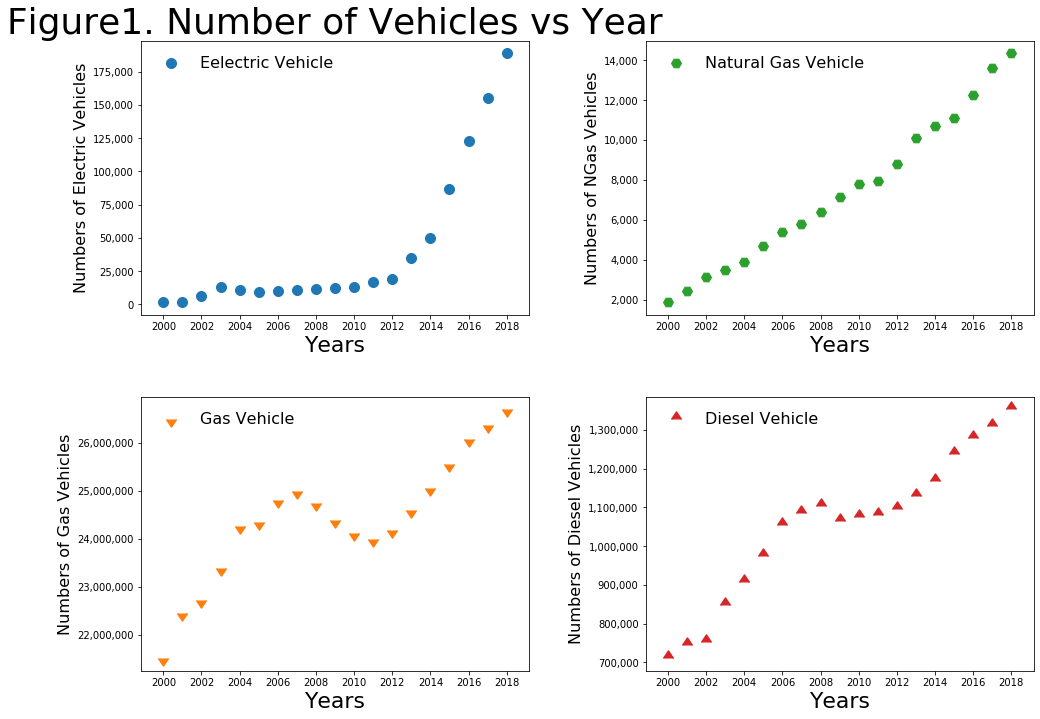

In [15]:
plt.figure(figsize=(16,10))
# plt.suptitle('Main title')

ax1=plt.subplot(2, 2, 1)
ax2=plt.scatter(Years,ELEC_pop, label='Eelectric Vehicle', marker='o', s=100) #marker=(numsides, style, angle)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Electric Vehicles',fontsize=16);
plt.xticks(np.arange(2000,2019,step=2)) #, rotation=45)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)#(ax2, 'Line 1') #, 'upper left')
plt.title('Figure1. Number of Vehicles vs Year', fontname = 'Calibri light', fontsize=36)


plt.subplot(2, 2, 4, sharex=ax1)
plt.scatter(Years,DSL_pop, c='tab:Red', label='Diesel Vehicle',marker=10, s=100)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Diesel Vehicles',fontsize=16);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)

plt.subplot(2, 2, 3, sharex=ax1)
plt.scatter(Years,GAS_pop, c='tab:Orange', label='Gas Vehicle',marker=11, s=100)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Gas Vehicles',fontsize=16);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)

plt.subplot(2, 2, 2, sharex=ax1)
plt.scatter(Years,NG_pop, c='tab:Green', label='Natural Gas Vehicle',marker='H', s=100)
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of NGas Vehicles',fontsize=16);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16)

plt.subplots_adjust(top=1.0, wspace=0.3, hspace=0.3) #bottom=0.75
# plt.savefig('Recession.jpg', dpi=600)


***

## California State has goal for rising the number of EVs to 1,500,000 by 2025
- **<font color=black>
Predicting numbers of EVs for 2025
</font>** <br> 

## Regression

In [16]:
X=np.array(Years).reshape(-1,1)
y=np.array(ELEC_pop).reshape(-1,1)
y_2025=np.array([2025]).reshape(-1,1)
lr = LinearRegression()
lr.fit(X, y)
y_pred_1 = lr.predict(X)
y_pred_1_25 = lr.predict(y_2025)
r_squared_1 = r2_score(y, y_pred_1)
print(r_squared_1)
mse_1 = mse(y, y_pred_1)
print(mse_1)

0.6352233472106339
1081727293.261479


In [17]:
poly_reg_2 = PolynomialFeatures(degree=2)
lin_reg_2 = LinearRegression()
X_poly_2= poly_reg_2.fit_transform(X)
lin_reg_2.fit(X_poly_2,y)


poly_reg_3 = PolynomialFeatures(degree=3)
lin_reg_3 = LinearRegression()
X_poly_3= poly_reg_3.fit_transform(X)
lin_reg_3.fit(X_poly_3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X_fit = np.arange(Years.min(), 2025, 1)[:, np.newaxis]
# print(X_fit.reshape(-1,1))

In [19]:
y_pred_2 = lin_reg_2.predict(poly_reg_2.fit_transform(X_fit.reshape(-1,1)))
xx_2=poly_reg_2.fit_transform(np.array([2025]).reshape(-1,1))
y_pred_2_25 = lin_reg_2.predict(xx_2)
r_squared_2 = r2_score(ELEC_pop, lin_reg_2.predict(X_poly_2))
mse_2 = mse(y, y_pred_2[0:19])


y_pred_3 = lin_reg_3.predict(poly_reg_3.fit_transform(X_fit.reshape(-1,1)))
xx_3=poly_reg_3.fit_transform(np.array([2025]).reshape(-1,1))
y_pred_3_25 = lin_reg_3.predict(xx_3)
r_squared_3 = r2_score(ELEC_pop, lin_reg_3.predict(X_poly_3))
mse_3 = mse(y, y_pred_3[0:19])


R^2 score for linear = 0.64
R^2 score for quadratic = 0.92
R^2 score for cubic     = 0.99


C:\Users\Administrator\.conda\envs\EnvKG\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

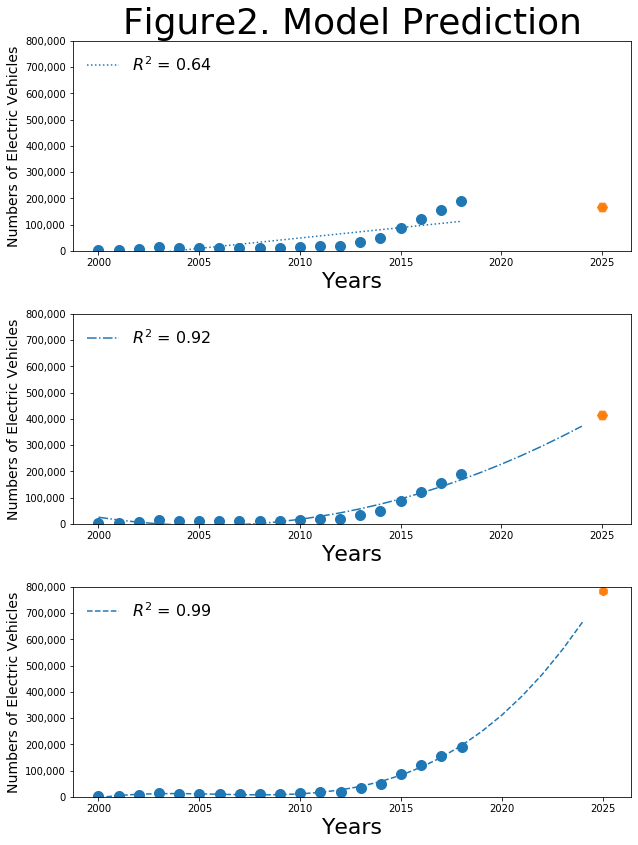

In [20]:
fig = plt.figure()
plt.figure(figsize=(10,12));

plt.subplot(3,1,1);
plt.scatter(X, y,marker='o', s=100);
plt.scatter(2025, y_pred_1_25,marker='H', s=100);
plt.plot(X, y_pred_1, linestyle=':', label="$R^2$ = {:.2f}".format(r_squared_1));
plt.ylim((0,800000))
plt.xlabel('Years',fontsize=22)
plt.ylabel('Numbers of Electric Vehicles',fontsize=14)
# plt.text(2, 5, 'mammad')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16, loc='upper left')
print("R^2 score for linear = {:.2f}".format(r2_score(y, y_pred_1)))
plt.title('Figure2. Model Prediction', fontname = 'Calibri light', fontsize=36)

plt.subplot(3,1,2)
plt.scatter(Years, ELEC_pop,marker='o', s=100);
plt.scatter(np.array([2025]), y_pred_2_25,marker='H', s=100);
plt.plot(X_fit, y_pred_2, linestyle='-.', label="$R^2$ = {:.2f}".format(r_squared_2));
plt.ylim((0,800000));
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Electric Vehicles',fontsize=14);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16, loc='upper left')
print("R^2 score for quadratic = {:.2f}".format(r2_score(ELEC_pop, lin_reg_2.predict(X_poly_2))))


# plt.figure(figsize=(10,12));
plt.subplot(3,1,3).scatter(Years, ELEC_pop,marker='o', s=100);
plt.subplot(3,1,3).scatter(np.array([2025]), y_pred_3_25,marker='h', s=75);
plt.plot(X_fit, y_pred_3, linestyle='--', label="$R^2$ = {:.2f}".format(r_squared_3));
plt.ylim((0,800000))
plt.xlabel('Years',fontsize=22);
plt.ylabel('Numbers of Electric Vehicles',fontsize=14);
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.legend(frameon=False, fontsize=16, loc='upper left')
print("R^2 score for cubic     = {:.2f}".format(r2_score(ELEC_pop, lin_reg_3.predict(X_poly_3))));
# plt.savefig('test.png', dpi=1200)
plt.subplots_adjust(top=1.00, wspace=0.5, hspace=0.3);

***
<h><center> 
# Comparing the performance of models 
<center>

findfont: Font family ['Calibri light'] not found. Falling back to DejaVu Sans.


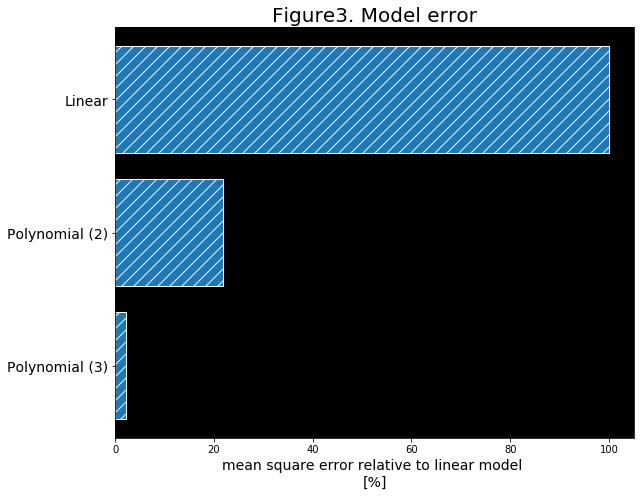

In [21]:
# Plot feature importance
feature_names = np.array(['Linear', 'Polynomial (2)','Polynomial (3)'])
feature_importance_rsquared = np.array([r_squared_1, r_squared_2, r_squared_3])
feature_importance_mse = np.array([mse_1, mse_2, mse_3])

# make importances relative to max importance
plt.figure(figsize=(9,7));
feature_importance_mse = 100.0 * ((feature_importance_mse / feature_importance_mse.max()))
sorted_idx = np.argsort(feature_importance_mse)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance_mse[sorted_idx], align='center', edgecolor='white', hatch="//")
plt.yticks(pos, feature_names[sorted_idx],fontsize=14)
plt.xlabel('mean square error relative to linear model \n[%]', fontsize=14)
plt.title('Figure3. Model error', fontname = 'Calibri light', fontsize=20)
haha=plt.gca()
haha.set_facecolor('xkcd:black')
plt.tight_layout()
# plt.savefig('ModelError.jpg')
plt.show()


In [22]:
print(feature_importance_mse)

[100.          21.79642217   2.11081066]


*** 
## Ratio Emission per Vehicle

In [23]:
Years=df['Calendar Year'].unique()
Emission_year=[]
Emission_ELEC=[]
Emission_DSL=[]
Emission_GAS=[]
Emission_NG=[]
for year in Years:
    Emission_year.append( (sum(df[(df['Calendar Year']==year)]['CO2_TOTEX'])) /
                         (sum(df[df['Calendar Year']==year]['Population'])) )

for year in Years:
    Emission_DSL.append(  sum(   df[(df['Fuel']=='DSL') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='DSL') & (df['Calendar Year']==year)]['Population'])  )

for year in Years:
    Emission_GAS.append(  sum(   df[(df['Fuel']=='GAS') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='GAS') & (df['Calendar Year']==year)]['Population'])  )
for year in Years:
    Emission_NG.append(  sum(   df[(df['Fuel']=='NG') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='NG') & (df['Calendar Year']==year)]['Population'])  )

for year in Years:
    Emission_ELEC.append(  sum(   df[(df['Fuel']=='ELEC') & (df['Calendar Year']==year)]['CO2_TOTEX'])  / 
                         sum(df[(df['Fuel']=='ELEC') & (df['Calendar Year']==year)]['Population'])  )
    
    

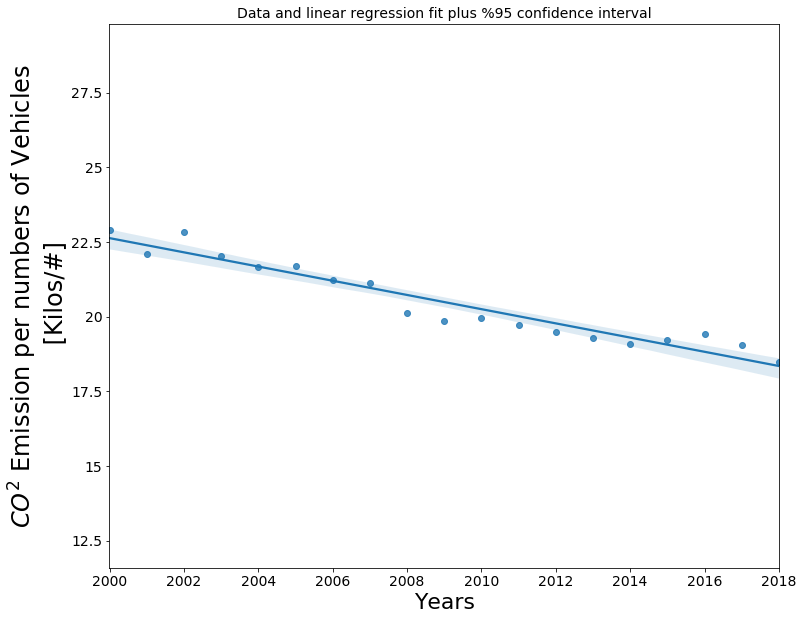

<Figure size 432x288 with 0 Axes>

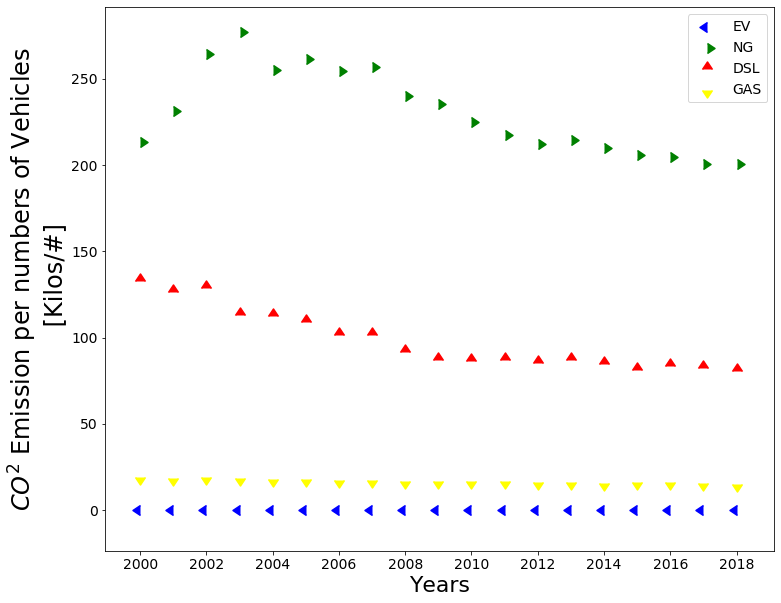

In [24]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(12, 10))    

# plt.figure(figsize=(12,10))
# plt.subplot(2, 2, 1)
#plt.subplot(2,1,1)
#plt.scatter(Years,Emission_year, c='Black')
sns.regplot(Years,Emission_year)#, x_estimator=np.mean)
plt.xticks(np.arange(2000,2019,step=2), fontsize=14) #, rotation=45)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1000))
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.yticks(fontsize=14)
plt.title('Data and linear regression fit plus %95 confidence interval', fontsize=14)


plt.xlabel('Years',fontsize=22)
plt.ylabel('$CO^2$ Emission per numbers of Vehicles\n [Kilos/#]',fontsize=24)
# xlabels = ['{:,.0f}'.format(x)
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter())

plt.show()

# plt.xlim((2000,2020))
# plt.subplot(2,1,2)
fig = plt.figure()
plt.figure(figsize=(12,10));

plt.scatter(Years,Emission_ELEC, c='Blue', label = 'EV',marker=8, s=100)
plt.scatter(Years,Emission_NG, c='Green', label = 'NG',marker=9, s=100)
plt.scatter(Years,Emission_DSL, c='Red', label = 'DSL',marker=10, s=100)
plt.scatter(Years,Emission_GAS, c='Yellow', label = 'GAS',marker=11, s=100)

plt.xlabel('Years',fontsize=22)
plt.xticks(np.arange(2000,2019,step=2), fontsize=14)
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*1000))
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.yticks(fontsize=14)
plt.ylabel('$CO^2$ Emission per numbers of Vehicles\n [Kilos/#]',fontsize=24)
plt.yscale
plt.legend(fontsize=14,loc = 'upper right')

***
<h><center>
## Summary and Future Works <center>

- __~%98__ improvmenet relative to base model (linear regression) was achieved
- __Data visualization__ on the California map
- Interactive emission and type of vehicle Data on map versus time
- Studying the effect of  __Neural Netwrok__ for imporiving the model


- Fun fact: Can you locate the recession on the data?

<img src="MSE.jpg" alt="drawing" width="600"/>

### Future work

![title](Cali_DataViz_Example.jpg)
### Fun fact: Can you locate the recession on the data?
<img src="Rec.jpg" alt="drawing" width="800"/>

## ANN modeling

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(np.array(Years).reshape(-1,1), np.array(ELEC_pop).reshape(-1,1), test_size = 0.08, random_state = 0)

In [26]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [27]:
# # Initialising the ANN
# model = Sequential()

# # Adding the input layer and the first hidden layer
# model.add(Dense(32, activation = 'relu', input_dim = 1))

# # Adding the second hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the third hidden layer
# model.add(Dense(units = 32, activation = 'relu'))

# # Adding the output layer
# model.add(Dense(units = 1))

In [28]:
# # Compiling the ANN
# model.compile(optimizer = 'adam',loss = 'mean_squared_error', metric='mse')

# # Fitting the ANN to the Training set
# model.fit(X_train, y_train, batch_size = 1 , epochs = 100, verbose=0)

In [29]:
# y_pred = model.predict(X_test)

In [30]:
# plt.plot(y_test, color = 'red', label = 'Real data')
# plt.plot(y_pred, color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

In [31]:
# model2 = LinearRegression()

In [32]:
# model2.fit(X_train, y_train)

In [33]:
# result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
# np.abs(result).sort_values(by='coefficient', ascending=False)

In [34]:
# y_pred = model.predict(X_test)

In [35]:
# plt.plot(y_test, color = 'red', label = 'Real data')
# plt.plot(y_pred, color = 'blue', label = 'Predicted data')
# plt.title('Prediction')
# plt.legend()
# plt.show()

## Let's zoom into the County temporal data

In [36]:
df_Alama = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-ALAMEDA-Annual.csv', skiprows=8, engine ='python')
df_Alpine = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-ALPINE-Annual.csv', skiprows=8, engine ='python')
df_Amador = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-AMADOR-Annual.csv', skiprows=8, engine ='python')
df_Butte = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-BUTTE-Annual.csv', skiprows=8, engine ='python')
df_Calaveras= pd.read_csv('Data_County/EMFAC2017-EI-2007Class-CALAVERAS-Annual.csv', skiprows=8, engine ='python')
df_Colusa = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-COLUSA-Annual.csv', skiprows=8, engine ='python')
df_Contracosta = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-CONTRACOSTA-Annual.csv', skiprows=8, engine ='python')
df_Delnorte = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-DELNORTE-Annual.csv', skiprows=8, engine ='python')
df_Eldorado = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-ELDORADO-Annual.csv', skiprows=8, engine ='python')
df_Fresno = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-FRESNO-Annual.csv', skiprows=8, engine ='python')
df_Glenn = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-GLENN-Annual.csv', skiprows=8, engine ='python')
df_Humboldt = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-HUMBOLDT-Annual.csv', skiprows=8, engine ='python')
df_Imperial = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-IMPERIAL-Annual.csv', skiprows=8, engine ='python')
df_Inyoa = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-INYO-Annual.csv', skiprows=8, engine ='python')
df_Kern = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-KERN-Annual.csv', skiprows=8, engine ='python')
df_Kings = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-KINGS-Annual.csv', skiprows=8, engine ='python')
df_Lake = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-LAKE-Annual.csv', skiprows=8, engine ='python')
df_Lassen = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-LASSEN-Annual.csv', skiprows=8, engine ='python')
df_Losangeles = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-LOSANGELES-Annual.csv', skiprows=8, engine ='python')
df_Madera = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-MADERA-Annual.csv', skiprows=8, engine ='python')
df_Marin = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-MARIN-Annual.csv', skiprows=8, engine ='python')
df_Mariposa = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-MARIPOSA-Annual.csv', skiprows=8, engine ='python')
df_Mendocino = pd.read_csv('Data_County/EMFAC2017-EI-2007Class-MENDOCINO-Annual.csv', skiprows=8, engine ='python')

In [37]:
df_Alama.head()

Region  Calendar Year Vehicle Category  Model Year       Speed Fuel  \
0  ALAMEDA           2001             HHDT  Aggregated  Aggregated  GAS   
1  ALAMEDA           2001             HHDT  Aggregated  Aggregated  DSL   
2  ALAMEDA           2001             HHDT  Aggregated  Aggregated   NG   
3  ALAMEDA           2001              LDA  Aggregated  Aggregated  GAS   
4  ALAMEDA           2001              LDA  Aggregated  Aggregated  DSL   

      Population           VMT         Trips  ROG_RUNEX  ...  PM2_5_TOTAL  \
0     165.236837  1.327169e+04  3.306059e+03   0.050660  ...     0.000594   
1    8886.962642  1.403935e+06  9.007106e+04   2.688919  ...     1.330657   
2       1.830051  9.995710e+01  7.137200e+00   0.000288  ...     0.000013   
3  608466.777100  2.223349e+07  2.848058e+06   5.364299  ...     0.676853   
4    4172.471718  9.638994e+04  1.740642e+04   0.034950  ...     0.028688   

   SOx_RUNEX  SOx_IDLEX  SOx_STREX  SOx_TOTEX  N2O_RUNEX  N2O_IDLEX  \
0   0.000502   0.000000   0.000006   0.000508   0.005486   0.000000   
1   0.252570   0.009173   0.000000   0.261743   0.450237   0.016352   
2   0.000000   0.000000   0.000000   0.000000   0.000075   0.000002   
3   0.122317   0.000000   0.003903   0.126220   1.049792   0.000000   
4   0.003258   0.000000   0.000000   0.003258   0.005805   0.000000   

   N2O_STREX  N2O_TOTEX  Fuel Consumption  
0   0.000097   0.005583          3.693355  
1   0.000000   0.466589        264.551833  
2   0.000000   0.000077          0.043539  
3   0.201008   1.250801        917.943364  
4   0.000000   0.005805          3.291307  

[5 rows x 66 columns]

In [38]:
dfC=df_Alama.append([df_Alpine,df_Amador,df_Amador,df_Butte,df_Calaveras,df_Calaveras,df_Colusa,df_Colusa,df_Contracosta,
                     df_Contracosta,df_Delnorte,df_Eldorado,df_Fresno,df_Glenn,df_Humboldt,df_Imperial,df_Inyoa,df_Kern,
                     df_Kings,df_Lake,df_Lassen,df_Losangeles,df_Madera,df_Marin,df_Mariposa,df_Mendocino])

In [39]:
dfC

Region  Calendar Year Vehicle Category  Model Year       Speed Fuel  \
0      ALAMEDA           2001             HHDT  Aggregated  Aggregated  GAS   
1      ALAMEDA           2001             HHDT  Aggregated  Aggregated  DSL   
2      ALAMEDA           2001             HHDT  Aggregated  Aggregated   NG   
3      ALAMEDA           2001              LDA  Aggregated  Aggregated  GAS   
4      ALAMEDA           2001              LDA  Aggregated  Aggregated  DSL   
..         ...            ...              ...         ...         ...  ...   
519  MENDOCINO           2019             SBUS  Aggregated  Aggregated  GAS   
520  MENDOCINO           2019             SBUS  Aggregated  Aggregated  DSL   
521  MENDOCINO           2019             UBUS  Aggregated  Aggregated  GAS   
522  MENDOCINO           2019             UBUS  Aggregated  Aggregated  DSL   
523  MENDOCINO           2019             UBUS  Aggregated  Aggregated   NG   

        Population           VMT         Trips  ROG_RUNEX  ...  PM2_5_TOTAL  \
0       165.236837  1.327169e+04  3.306059e+03   0.050660  ...     0.000594   
1      8886.962642  1.403935e+06  9.007106e+04   2.688919  ...     1.330657   
2         1.830051  9.995710e+01  7.137200e+00   0.000288  ...     0.000013   
3    608466.777100  2.223349e+07  2.848058e+06   5.364299  ...     0.676853   
4      4172.471718  9.638994e+04  1.740642e+04   0.034950  ...     0.028688   
..             ...           ...           ...        ...  ...          ...   
519      11.629787  5.640552e+02  4.651915e+01   0.000141  ...     0.000202   
520     134.233551  4.239196e+03  1.549037e+03   0.000614  ...     0.001784   
521      21.311988  2.041555e+03  8.524795e+01   0.000038  ...     0.000114   
522       7.708834  6.302270e+02  3.083533e+01   0.000005  ...     0.000033   
523       8.487697  7.358197e+02  3.395079e+01   0.000076  ...     0.000036   

     SOx_RUNEX     SOx_IDLEX     SOx_STREX  SOx_TOTEX  N2O_RUNEX  \
0     0.000502  0.000000e+00  5.591870e-06   0.000508   0.005486   
1     0.252570  9.172963e-03  0.000000e+00   0.261743   0.450237   
2     0.000000  0.000000e+00  0.000000e+00   0.000000   0.000075   
3     0.122317  0.000000e+00  3.902975e-03   0.126220   1.049792   
4     0.003258  0.000000e+00  0.000000e+00   0.003258   0.005805   
..         ...           ...           ...        ...        ...   
519   0.000006  3.363205e-07  3.039214e-08   0.000006   0.000039   
520   0.000052  5.138220e-06  0.000000e+00   0.000057   0.000870   
521   0.000039  0.000000e+00  6.663087e-08   0.000039   0.000045   
522   0.000010  0.000000e+00  0.000000e+00   0.000010   0.000161   
523   0.000000  0.000000e+00  0.000000e+00   0.000000   0.000297   

        N2O_IDLEX  N2O_STREX  N2O_TOTEX  Fuel Consumption  
0    0.000000e+00   0.000097   0.005583          3.693355  
1    1.635196e-02   0.000000   0.466589        264.551833  
2    1.895210e-06   0.000000   0.000077          0.043539  
3    0.000000e+00   0.201008   1.250801        917.943364  
4    0.000000e+00   0.000000   0.005805          3.291307  
..            ...        ...        ...               ...  
519  9.320453e-07   0.000002   0.000042          0.062855  
520  8.548889e-05   0.000000   0.000955          0.541719  
521  0.000000e+00   0.000006   0.000051          0.420802  
522  0.000000e+00   0.000000   0.000161          0.091563  
523  0.000000e+00   0.000000   0.000297          0.168182  

[14654 rows x 66 columns]

In [40]:
YearsC=dfC['Calendar Year'].unique()
RegionsC=dfC['Region'].unique()

ELEC_popC=[]
ELEC_popCY=[]
for region in RegionsC:
        ELEC_popC.append(sum(dfC[(dfC['Fuel']=='ELEC') & (dfC['Region']== region)]['Population']))
for year in Years:
    for region in RegionsC:
        ELEC_popCY.append(sum(dfC[(dfC['Fuel']=='ELEC') & (dfC['Calendar Year']==year) & (dfC['Region']== region)]['Population']))
    
DSL_popC=[]
for year in Years:
    for region in RegionsC:
        DSL_popC.append(sum(dfC[(dfC['Fuel']=='DSL') & (dfC['Calendar Year']==year) & (dfC['Region']== region)]['Population']))
    
GAS_popC=[]
for year in Years:
    for region in RegionsC:
        GAS_popC.append(sum(dfC[(dfC['Fuel']=='GAS') & (dfC['Calendar Year']==year) & (dfC['Region']== region)]['Population']))
    
NG_popC=[]
for year in Years:
    for region in RegionsC:
        NG_popC.append(sum(dfC[(dfC['Fuel']=='NG') & (dfC['Calendar Year']==year) & (dfC['Region']== region)]['Population']))

In [44]:
import geopandas as gpd

In [46]:
wards = gpd.read_file('C:\\Users\\Administrator\\Desktop\\TDI-Spirng2020 Project\\GeoJSON Data\\mygeodata\\CA_Counties_TIGER2016.geojson')

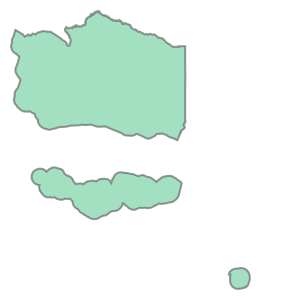

In [53]:
wards.loc[2,'geometry']

In [57]:
california_center=(37.837769,-120.749135)

m = folium.Map(location=california_center, zoom_start=8)
# folium.GeoJson(wards.to_json()).add_to(m)
folium.GeoJson('C:\\Users\\Administrator\\Desktop\\TDI-Spirng2020 Project\\GeoJSON Data\\gz_2010_us_050_00_20m.json').add_to(m)
# folium.GeoJson('C:\\Users\\Administrator\\Desktop\\TDI-Spirng2020 Project\\GeoJSON Data\\LA.json').add_to(m)
m.save('C:\\Users\Administrator\\Desktop\\TDI-Spirng2020 Project\\GeoJSON Datafolium_boundaries.html')

In [58]:
m

In [55]:
# from branca.colormap import linear

# ### OrRd colormap is kind of similar to tabelog score colors
# colormap = linear.OrRd.scale( ELEC_popC.min(), ELEC_popC.max() )
# colors=pd.DataFrame('ELEC_popC')
# colors = ELEC_popC.apply(colormap)
# colors.sample(5)

In [ ]:
# m = folium.Map(location=california_center, #tiles='Stamen Toner',
#                     zoom_start=11)

# folium.GeoJson(
#     wards.to_json(),
#     style_function=lambda feature: {
#         'fillColor': colors.loc[feature['id']],
#         'color': 'black',
#         'weight': 1,
#         'dashArray': '5, 5',
#         'fillOpacity': 0.8,
#         'highlight': True
#     }
# ).add_to(m)

# # folium.LayerControl().add_to(m)
# m.add_child(colormap)
# m.save('html/ward_choropleth_in_slides.html')
# #folium.LayerControl().add_to(m)